Fourier Transform is a mathematical method to analyze frequency components in one dimensional signal, such as sound or radio wave. 

### What is 2-D Fourier Transform
This is a type of Fourier Transform which takes 2-dimensional data (2-D numpy array) as input, and returns another 2-dimensional data. We usually use this 2-D Fourier Transform on images.
Here is an example of applying Fourier Transform on a gray scale image. Each element of the output is a complex number. So we usually take the absolute values of the output such that it can be displayed as an image.
There is also the inverse of Fourier Transform (IFT), which takes a frequency domain image as input and then restores the original image. We can make use of this inverse transform to apply some interesting techniques on images, such as Low Pass Filter or motion estimation of camera.

### Interpreting the frequency domain image
You can see that the result image of the example above has brightest pixels (larger values) at the center and outer size pixels relatively less bright (smaller values).
<img src="freq_domain.png" width=800 height=790>
The output frequency domain image tells us how much each frequency component is included in the original image. Pixels near the center represent lower frequency components, and outer side pixels represent higher frequency component. Thus, if pixels near the center are brighter than others outer side, this means that the original image is composed with lower frequency components more than higher frequency components.
Here, a lower frequency component of an image appears in the original image as rough shape of large objects. Conversely, a higher frequency component can add some details into the image, such as the texture of the ground in the example image above. Remember that small objects and edges of objects are mainly made of higher frequencies.

### Fourier Transform of Image using opencv
 “dft” means “discrete fourier transform”, since an image is a collection discrete values, not continuous ones.
 

## 4.6.5 Fourier Spectrum and Phase Angle

In [4]:
import cv2 as cv
import cv2
import numpy as np
from matplotlib import pyplot as plt

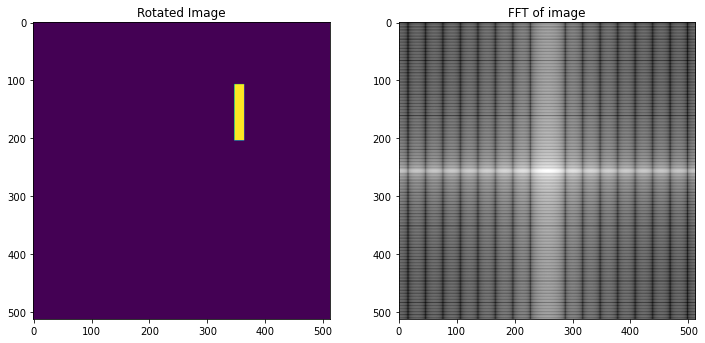

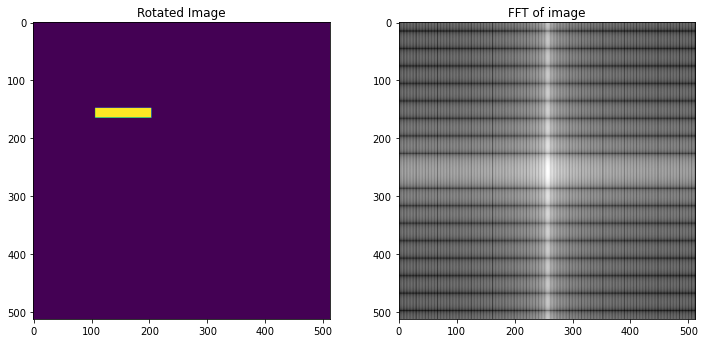

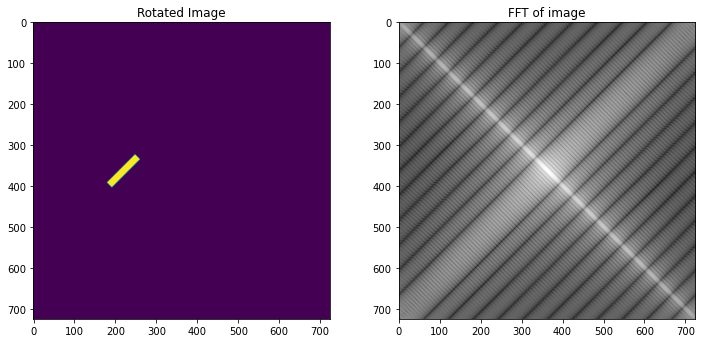

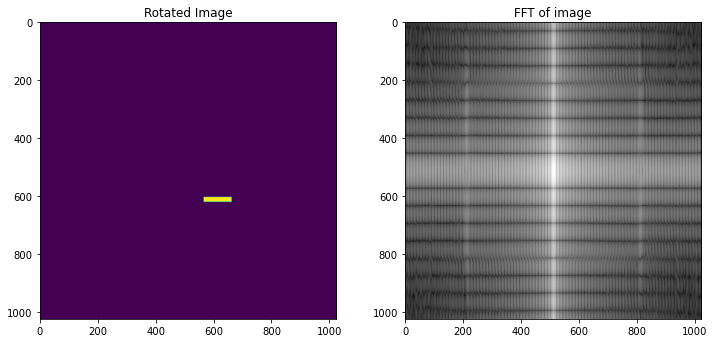

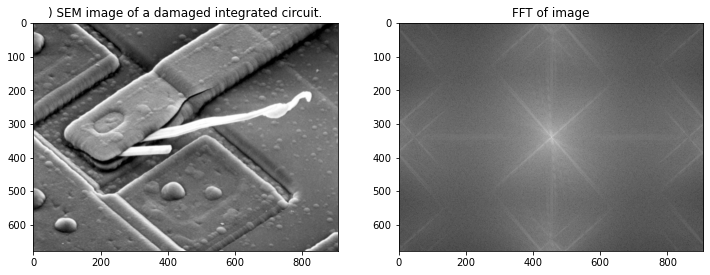

In [5]:
#Generate a 2D sine wave image
x = np.arange(256)  # generate values from 0 to 255 (our image size)
y = np.sin(2 * np.pi * x / 3)  #calculate sine of x values
#Divide by a smaller number above to increase the frequency.
y += max(y) # offset sine wave by the max value to go out of negative range of sine 

#Generate a 256x256 image (2D array of the sine wave)
img = np.array([[y[j]*127 for j in range(256)] for i in range(256)], dtype=np.uint8) # create 2-D array of sine-wave

  #Rotate img by 90 degrees

img = cv2.imread('DIP3E_Original_Images_CH04/Fig0425(a)(translated_rectangle).tif', 0) # load an image
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

#Shift DFT. First check the output without the shift
#Without shifting the data would be centered around origin at the top left
#Shifting it moves the origin to the center of the image. 
dft_shift = np.fft.fftshift(dft)

#Calculate magnitude spectrum from the DFT (Real part and imaginary part)
#Added 1 as we may see 0 values and log of 0 is indeterminate
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)


#As the spatial frequency increases (bars closer), 
#the peaks in the DFT amplitude spectrum move farther away from the origin

#Center represents low frequency and the corners high frequency (with DFT shift).
#To build high pass filter block center corresponding to low frequencies and let
#high frequencies go through. This is nothing but an edge filter. 

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text('Rotated Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap="gray")
ax2.title.set_text('FFT of image')

img = np.rot90(img) # load an image
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text('Rotated Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap="gray")
ax2.title.set_text('FFT of image')


from scipy.ndimage import rotate
img=rotate(img, angle=45)
#img = np.rot90(img) # load an image
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text('Rotated Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap="gray")
ax2.title.set_text('FFT of image')


img=rotate(img, angle=45+90)
#img = np.rot90(img) # load an image
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text('Rotated Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap="gray")
ax2.title.set_text('FFT of image')


img=cv.imread("DIP3E_Original_Images_CH04/Fig0429(a)(blown_ic).tif",0)
#img = np.rot90(img)
#gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# load an image
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap="gray")
ax1.title.set_text(') SEM image of a damaged integrated circuit.')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap="gray")
ax2.title.set_text('FFT of image')



plt.show()

##  LPF mask

<ipython-input-6-3a61c9da3f5d>:21: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


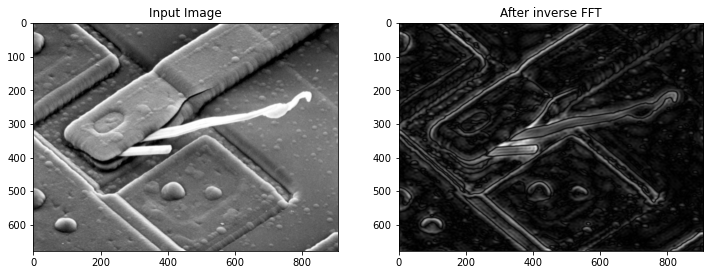

In [6]:
# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)

r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1



# apply mask and inverse DFT: Multiply fourier transformed image (values)
#with the mask values. 
fshift = dft_shift * mask

#Get the magnitude spectrum (only for plotting purposes)
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

#Inverse shift to shift origin back to top left.
f_ishift = np.fft.ifftshift(fshift)

#Inverse DFT to convert back to image domain from the frequency domain. 
#Will be complex numbers
img_back = cv2.idft(f_ishift)

#Magnitude spectrum of the image domain
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])



fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax4 = fig.add_subplot(2,2,2)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()


## HPF mask

<ipython-input-7-00df8be996e7>:62: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


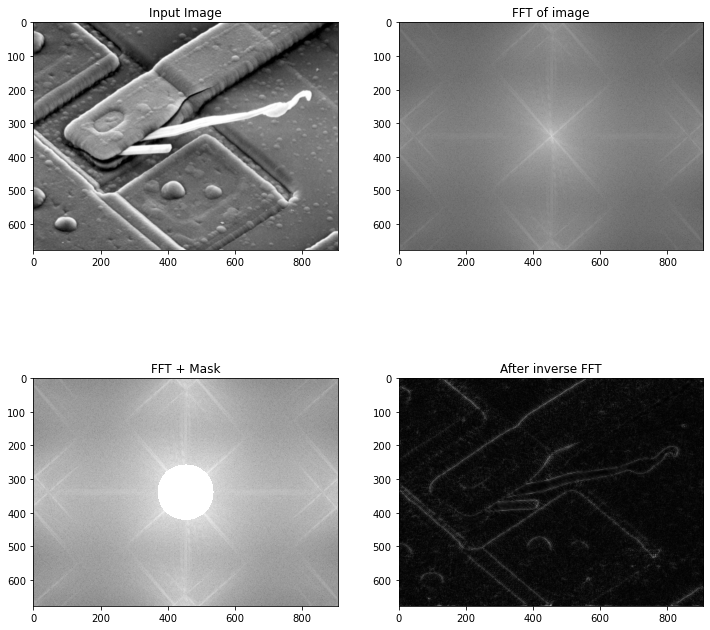

In [7]:
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

#Rearranges a Fourier transform X by shifting the zero-frequency 
#component to the center of the array.
#Otherwise it starts at the tope left corenr of the image (array)
dft_shift = np.fft.fftshift(dft)

##Magnitude of the function is 20.log(abs(f))
#For values that are 0 we may end up with indeterminate values for log. 
#So we can add 1 to the array to avoid seeing a warning. 
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))


# Circular HPF mask, center circle is 0, remaining all ones
#Can be used for edge detection because low frequencies at center are blocked
#and only high frequencies are allowed. Edges are high frequency components.
#Amplifies noise.

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0


# Circular LPF mask, center circle is 1, remaining all zeros
# Only allows low frequency components - smooth regions
#Can smooth out noise but blurs edges.
#
"""
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1
# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1
"""


# apply mask and inverse DFT: Multiply fourier transformed image (values)
#with the mask values. 
fshift = dft_shift * mask

#Get the magnitude spectrum (only for plotting purposes)
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

#Inverse shift to shift origin back to top left.
f_ishift = np.fft.ifftshift(fshift)

#Inverse DFT to convert back to image domain from the frequency domain. 
#Will be complex numbers
img_back = cv2.idft(f_ishift)

#Magnitude spectrum of the image domain
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])



fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()


<ipython-input-15-2acc5c87833b>:25: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


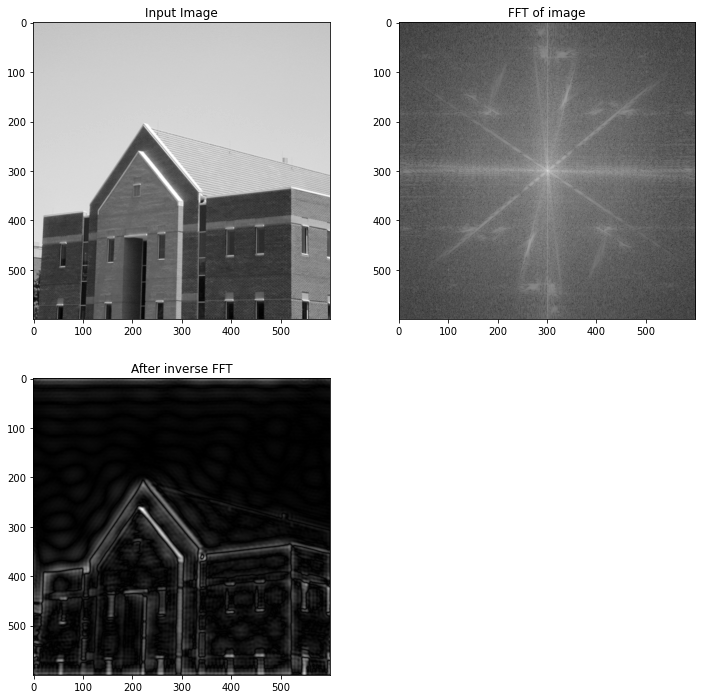

In [15]:
img = cv.imread('DIP3E_Original_Images_CH04/Fig0438(a)(bld_600by600).tif',0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)

r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1



# apply mask and inverse DFT: Multiply fourier transformed image (values)
#with the mask values. 
fshift = dft_shift * mask

#Get the magnitude spectrum (only for plotting purposes)
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

#Inverse shift to shift origin back to top left.
f_ishift = np.fft.ifftshift(fshift)

#Inverse DFT to convert back to image domain from the frequency domain. 
#Will be complex numbers
img_back = cv2.idft(f_ishift)

#Magnitude spectrum of the image domain
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])


"""
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')"""


fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap="gray")
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap="gray")
ax2.title.set_text('FFT of image')
ax4 = fig.add_subplot(2,2,3)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()


## Image smoothing using an Ideal Low Pass Filter.

<ipython-input-22-c7231d90491e>:21: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


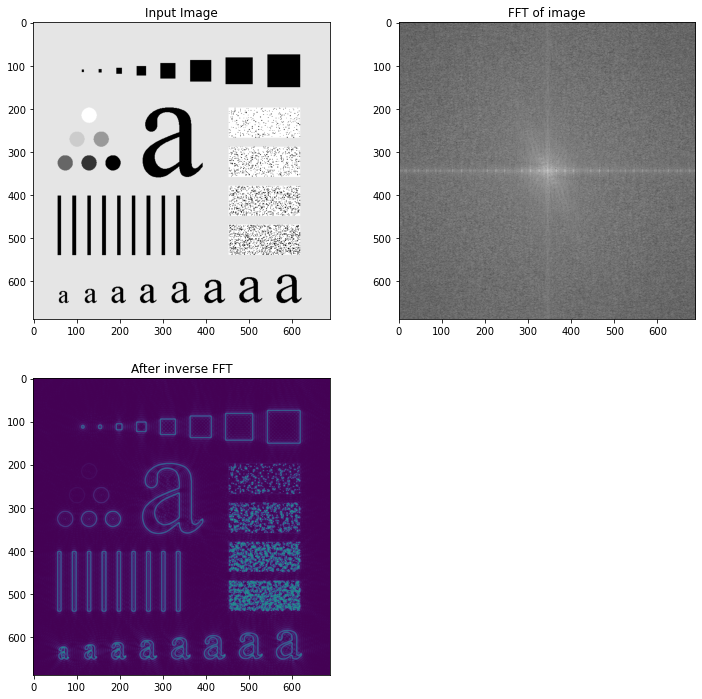

In [22]:
img = cv.imread('DIP3E_Original_Images_CH04/Fig0441(a)(characters_test_pattern).tif',0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))+1)
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0


# apply mask and inverse DFT: Multiply fourier transformed image (values)
#with the mask values. 
fshift = dft_shift * mask

#Get the magnitude spectrum (only for plotting purposes)
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

#Inverse shift to shift origin back to top left.
f_ishift = np.fft.ifftshift(fshift)

#Inverse DFT to convert back to image domain from the frequency domain. 
#Will be complex numbers
img_back = cv2.idft(f_ishift)

#Magnitude spectrum of the image domain
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])


"""
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')"""


fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap="gray")
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap="gray")
ax2.title.set_text('FFT of image')
ax4 = fig.add_subplot(2,2,3)
ax4.imshow(img_back)
ax4.title.set_text('After inverse FFT')
plt.show()


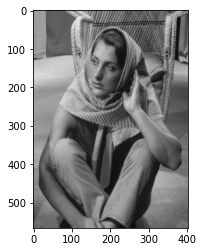

In [7]:
img = cv.imread('1.tif') # load an image
img = img[:,:,2] # blue channel
plt.imshow(img, cmap='gray')

(566, 402)
(566, 402, 2)
(566, 402)


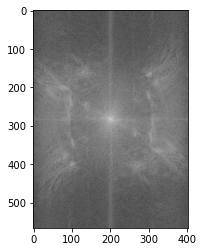

In [8]:
print(img.shape)
f = cv.dft(np.float32(img), flags=cv.DFT_COMPLEX_OUTPUT)
print(f.shape)
f_shift = np.fft.fftshift(f)
f_complex = f_shift[:,:,0] + 1j*f_shift[:,:,1]
print(f_complex.shape)
f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
f_bounded = 20 * np.log(f_abs)
f_img = 255 * f_bounded / np.max(f_bounded)
f_img = f_img.astype(np.uint8)
plt.imshow(f_img, cmap='gray')

The output of cv.dft() function is a 3-dimensional numpy array of shape (566, 402, 2). Since, in mathematics, the output of 2-D Fourier Transform is a 2-dimensional complex array, the first and second channel of f are the real part and imaginary part respectively. 

f_complex is, thus, the complex version of f.
In the following few lines, we convert the complex numpy array f_complex to the one which can be shown as an image.

At the 5th line, we take the logarithm of the absolute value of f_complex, because f_abs has tremendously wide range. 

The last 3 lines make sure that all elements of f_img lie between 0 and 255.
Do not forget to add 1 to f_abs, since the argument to the logarithm function should be greater than or equal to 1.0. Also note that the data type of f_img is 8-bit unsigned-int, because we want to display it as an image.

Brighter pixels correspond to larger values. Thus, this result means that the original image contained lower frequency components more than higher frequency components.

### Image Fourier Transform with NumPy

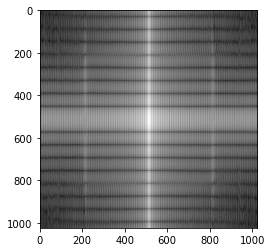

In [53]:
f = np.fft.fft2(img)
f_shift = np.fft.fftshift(f)
f_complex = f_shift
f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
f_bounded = 20 * np.log(f_abs)
f_img = 255 * f_bounded / np.max(f_bounded)
f_img = f_img.astype(np.uint8)
plt.imshow(f_img, cmap="gray")

### Conclusion
Both transform function is quite easy to use. However if we want to use Fourier Transform in real time speed, we should use cv2.fft() function rather than np.fft.fft2().

### Understanding the frequency of an image

But there’s one difference between 1-D and 2-D Fourier Transform. It’s that, in 2-D Fourier Transform or in Image Fourier Transform, we have frequencies in both x and y direction. In the example image above, we have changes of pattern along just the y-axis. Therefore, the image doesn’t have any x direction frequency, and thus the Fourier Transform of this image look like the image below. You can see that it has white pixels (higher values) just along the y-axis, and any other pixels are all black (zero values). This means the original image has multiple y direction frequencies.


## Low-pass filter
A low-pass filter is a technique used in computer vision to get a blurred image, or to store an image with less space.
A low-pass filter can be applied only on the Fourier Transform of an image (frequency-domain image), rather than the original image (spacial-domain image). After applying low-pass filter on it, then the filtered frequency-domain image is restored into pixel image, which is a blurred version of the original image.
#### Low-pass filter
Actually, a low-pass filter is just a gray-scale image, whose values are higher near the center, and close to zero outside. Therefore, low-pass filters usually look like the following image. This is one of the most popular filter called “Hamming window (wiki)”.

Then multiply this gray-scale image to the Fourier Transform of the original image. 
What we get is another frequency-domain image, whose values outer side are squashed to zero. This means that higher frequency components are removed, and lower frequency components remain unchanged.
The following is the comparison of the original transformed image and filtered one. You can see that higher frequency component (outer side) are removed and get darker.

Inverse Fourier Transform
We then apply Inverse Fourier Transform of the result. What we get is a blurred image (comparison in the following).

## fftshift
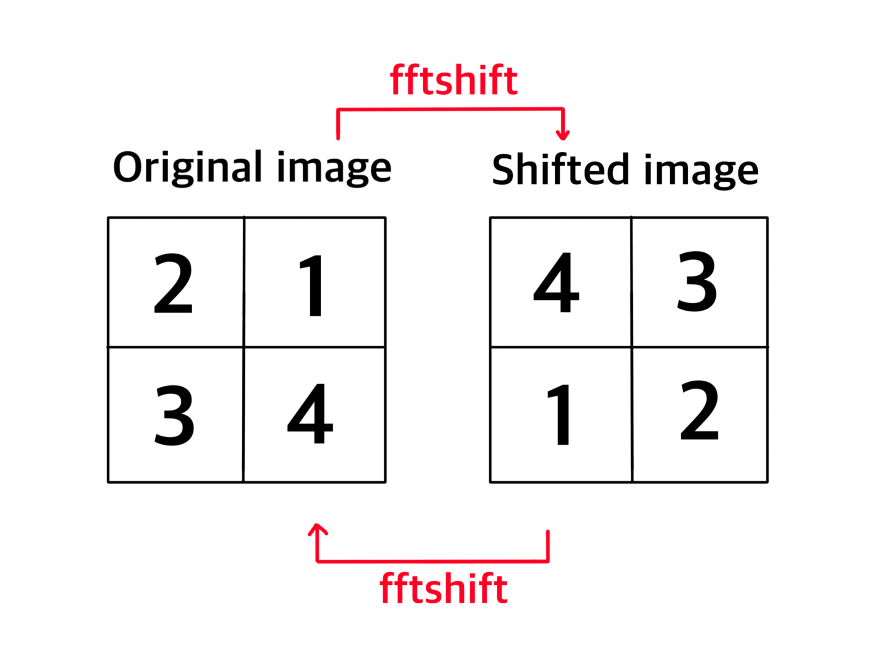
 np.fft.fftshift() function does is to just divide an image into four small images, and then rearrange them such that it becomes symmetric about the center.

If we apply fftshift() against a shifted image, then the original image is restored.
If we do not apply shifting, the transformed image looks like the following.


In [10]:
img_path = '1.tif'
img = cv2.imread(img_path)[:,:,0] # gray-scale image
img = img[:700, :700] # crop to 700 x 700 
r = 50 # how narrower the window is
ham = np.hamming(700)[:,None] # 1D hamming
ham2d = np.sqrt(np.dot(ham, ham.T)) ** r # expand to 2D hamming

In [11]:
f = cv2.dft(img.astype(np.float32), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shifted = np.fft.fftshift(f)
f_complex = f_shifted[:,:,0]*1j + f_shifted[:,:,1]
f_filtered = ham2d * f_complex

# The Hamming window (filter) is 
#applied just by multiplying it to the complex version of the transformed image.

ValueError: operands could not be broadcast together with shapes (700,700) (566,402) 

<ipython-input-26-46d8cd3e8ea2>:65: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


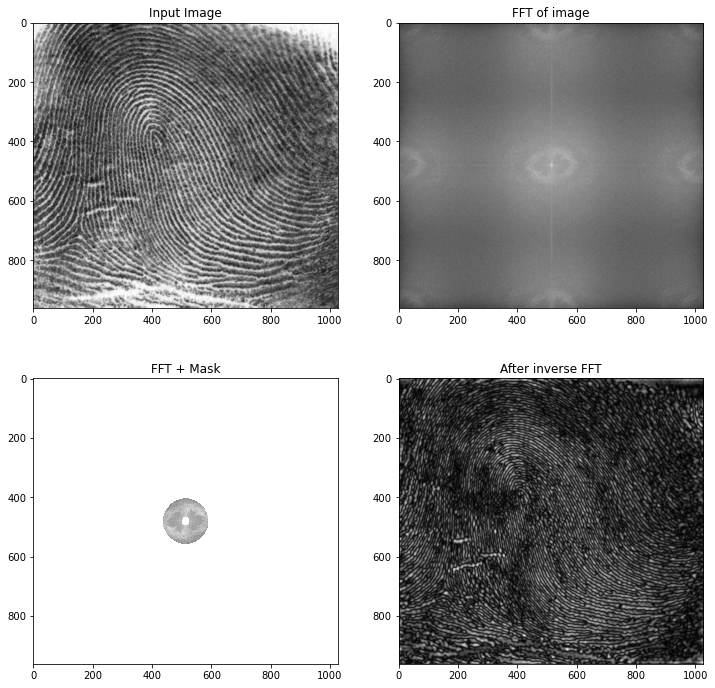

In [26]:
import cv2
import numpy as np
img=cv.imread('DIP3E_Original_Images_CH04/Fig0457(a)(thumb_print).tif',0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)

#Rearranges a Fourier transform X by shifting the zero-frequency 
#component to the center of the array.
#Otherwise it starts at the tope left corenr of the image (array)
dft_shift = np.fft.fftshift(dft)

##Magnitude of the function is 20.log(abs(f))
#For values that are 0 we may end up with indeterminate values for log. 
#So we can add 1 to the array to avoid seeing a warning. 
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))


# Circular HPF mask, center circle is 0, remaining all ones
#Can be used for edge detection because low frequencies at center are blocked
#and only high frequencies are allowed. Edges are high frequency components.
#Amplifies noise.

'''rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0
'''

# Circular LPF mask, center circle is 1, remaining all zeros
# Only allows low frequency components - smooth regions
#Can smooth out noise but blurs edges.
#

rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1
# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                           ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1



# apply mask and inverse DFT: Multiply fourier transformed image (values)
#with the mask values. 
fshift = dft_shift * mask

#Get the magnitude spectrum (only for plotting purposes)
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

#Inverse shift to shift origin back to top left.
f_ishift = np.fft.ifftshift(fshift)

#Inverse DFT to convert back to image domain from the frequency domain. 
#Will be complex numbers
img_back = cv2.idft(f_ishift)

#Magnitude spectrum of the image domain
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])



fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
#img_back=cv2.cvtColor(img_back, cv2.COLOR_BGR2RGB)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()


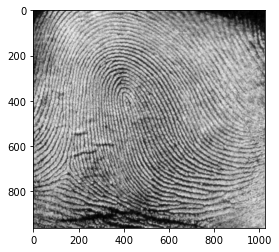

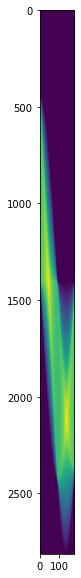

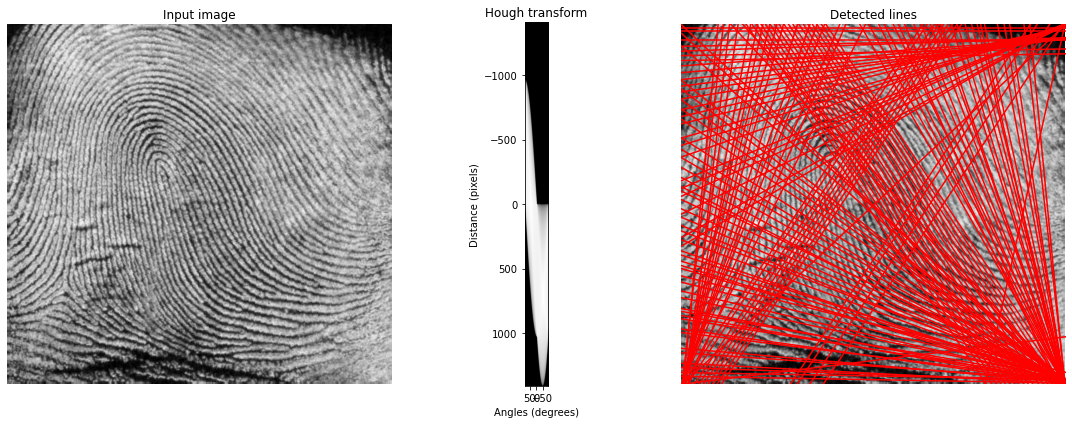

1.005586592178787


In [28]:
from skimage.transform import (hough_line, hough_line_peaks)
import numpy as np
import cv2
from matplotlib import pyplot as plt

image = cv2.imread('DIP3E_Original_Images_CH04/Fig0457(a)(thumb_print).tif', 0) #Fails if uses as-is due to bright background.
#Also try lines2 to see how it only picks up straight lines
#Invert images to show black background
image = ~image  #Invert the image (only if it had bright background that can confuse hough)
plt.imshow(image, cmap='gray')

# Set a precision of 1 degree. (Divide into 180 data points)
# You can increase the number of points if needed. 
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 180)

# Perform Hough Transformation to change x, y, to h, theta, dist space.
hspace, theta, dist = hough_line(image, tested_angles)

plt.figure(figsize=(10,10))
plt.imshow(hspace)  


#Now, to find the location of peaks in the hough space we can use hough_line_peaks
h, q, d = hough_line_peaks(hspace, theta, dist)


#################################################################
#Example ode from skimage documentation to plot the detected lines
angle_list=[]  #Create an empty list to capture all angles

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + hspace),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
             cmap='gray', aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap='gray')

origin = np.array((0, image.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

###############################################################
# Convert angles from radians to degrees (1 rad = 180/pi degrees)
angles = [a*180/np.pi for a in angle_list]

# Compute difference between the two lines
angle_difference = np.max(angles) - np.min(angles)
print(180 - angle_difference)   #Subtracting from 180 to show it as the small angle between two lines